# DSC350 - Week 6 - Exercise 6.2

We begin the exercises this week by importing the necessary libraries and files.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fb = pd.read_csv(r'C:\Users\thefli0\Downloads\fb_stock_prices_2018.csv')
quakes = pd.read_csv(r'C:\Users\thefli0\Downloads\earthquakes (1).csv')

## Hands-On Data Analysis with Python (2nd Edition): Page 320, Exercises 1-4, and 6

Create the following visualizations using what you have learned up to this point in this book. Use the data from this chapter's *data/* directory.

**1. Plot the rolling 20-day minimum of the Facebook closing price using pandas.**

<Axes: title={'center': '20-day Rolling Minimum of Facebook Closing Prices in 2018'}, xlabel='date'>

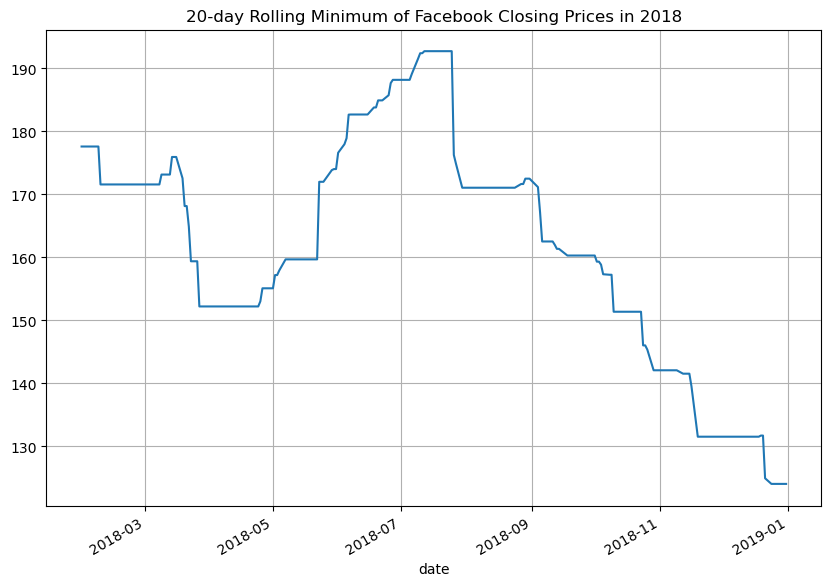

In [2]:
# Ensure 'date' column is correct format
fb['date'] = pd.to_datetime(fb['date'])

# Set date column as index
fb.set_index('date', inplace=True)

# Calculate rolling 20-day minimum of closing price
fb['20_day_min_close'] = fb['close'].rolling(window=20).min()

# Plot rolling minv closing price with pandas
fb['20_day_min_close'].plot(figsize=(10, 7), title= '20-day Rolling Minimum of Facebook Closing Prices in 2018', grid=True)

**2. Create a histogram and KDE of the change from open to close in the Facebook stock.**

<Axes: title={'center': 'Daily Change of Facebook Stock Prices from Open to Close'}, ylabel='Density'>

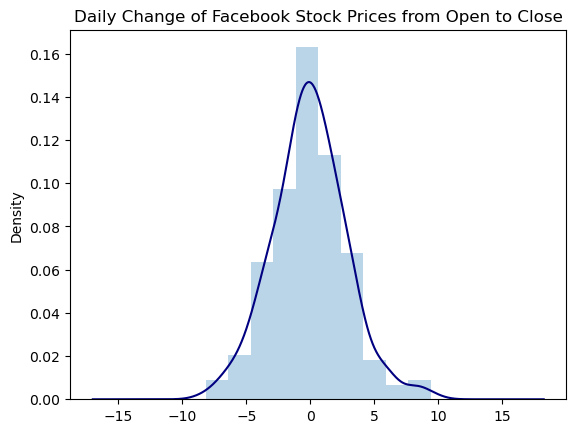

In [3]:
# Calculate the change from open to close
differential = fb.open - fb.close

# Plot the histogram and KDE 
ax = differential.plot(kind='hist', density=True, alpha=0.3)
# Specify labels and formatting
differential.plot(
    kind='kde', color='navy', ax=ax, 
    title='Daily Change of Facebook Stock Prices from Open to Close'
)

**3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.**

mb            Axes(0.1,0.15;0.173913x0.75)
ms_20    Axes(0.308696,0.15;0.173913x0.75)
mwr      Axes(0.517391,0.15;0.173913x0.75)
mww      Axes(0.726087,0.15;0.173913x0.75)
dtype: object

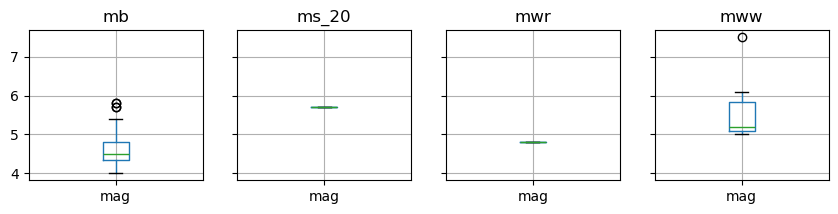

In [4]:
# Create box plots for each magnitude type in Indonesia, include filtering and plot formatting
quakes.query('parsed_place == "Indonesia"')[['mag', 'magType']]\
    .groupby('magType').boxplot(layout=(1, 4), figsize=(10, 2))

**4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.**

<Axes: title={'center': 'Difference between Weekly Maximum High Price\nand Weekly Minimum Low Price of Facebook Stock'}, xlabel='date'>

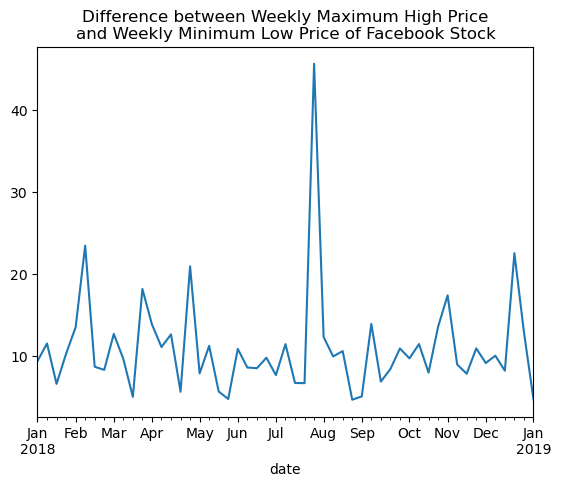

In [5]:
# Resample the data by week for the weekly high and weekly low
fb.resample('1W').agg(
    dict(high='max', low='min')
).assign(
    # Calculate the difference between max high and min low
    max_change_weekly=lambda x: x.high - x.low
).max_change_weekly.plot(
    # Format title and plot the line
    title='Difference between Weekly Maximum High Price\n'
          'and Weekly Minimum Low Price of Facebook Stock'
)

**6. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock prices:**
 - a) The first subplot will contain a line plot of the daily difference between the day's opening price and the prior day's closing price (be sure to review the *Working with time series data* section of Chapter 4, *Aggregating Pandas DataFrames*, for an easy way to do this).
 - b) The second subplot will be a bar plot showing the net effect this had monthly, using resample().
 - c) Bonus #1: Color the bars according to whether there are gains in the stock price (green) or drop in the stock price (red).
 - d) Bonus #2: Modify the x-axis of the bar plot to show the three-letter abbreviation for the month.

<Axes: title={'center': 'Effect of After Hours Trading (Monthly)'}, xlabel='date'>

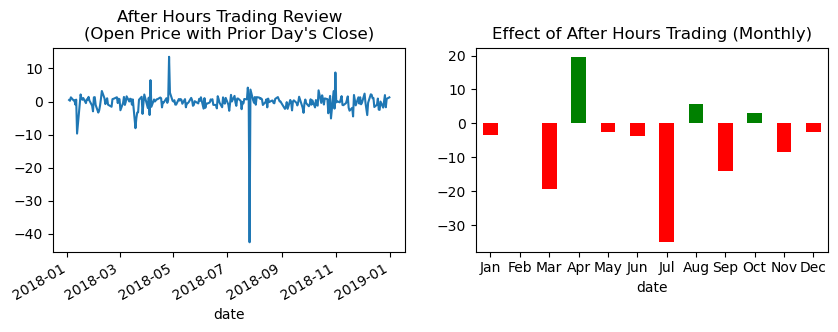

In [6]:
# Specify subplot and calculate the difference
series = (fb.open - fb.close.shift())
# Use resample() for second subplot to show net effect on monthly
monthly_effect = series.resample('1M').sum()

# Specify both subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Plot first subplot and format accordingly
series.plot(
    ax=axes[0],
    title='After Hours Trading Review\n(Open Price with Prior Day\'s Close)'
)

# Format the string representative for the month abbreviation
monthly_effect.index = monthly_effect.index.strftime('%b')
# Plot the second subplot and format accordingly
monthly_effect.plot(
    ax=axes[1],
    kind='bar', 
    title='Effect of After Hours Trading (Monthly)',
    # Format color for gains and losses
    color=np.where(monthly_effect >= 0, 'g', 'r'),
    rot=0
)